In [1]:
import pennylane as qml
import pennylane.numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')

#### Codercise I.10.1 - Measurement of the PauliY observable

In [2]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def circuit():
    qml.RX(np.pi/4, 0)
    qml.Hadamard(0)
    qml.PauliZ(0)

    return qml.expval(qml.PauliY(0))

print(circuit())

-0.7071067811865471


#### Codercise I.10.2 - Setting up the number of experiment shots

In [3]:
# An array to store your results
shot_results = []

# Different numbers of shots
shot_values = [100, 1000, 10000, 100000, 1000000]

for shots in shot_values:
    dev = qml.device('default.qubit', wires=1, shots=shots)

    @qml.qnode(dev)
    def circuit():
        
        qml.RX(np.pi/4, 0)
        qml.Hadamard(0)
        qml.PauliZ(0)
    
        return qml.expval(qml.PauliY(0))

    shot_results.append(circuit())

print(qml.math.unwrap(shot_results))

[-0.72, -0.74, -0.7056, -0.70574, -0.70725]


#### Codercise I.10.3 - Evaluating the Samples

In [4]:
dev = qml.device("default.qubit", wires=1, shots=100000)


@qml.qnode(dev)
def circuit():
    
    qml.RX(np.pi / 4, wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)

    return qml.sample(qml.Y(0))


def compute_expval_from_samples(samples):
    """Compute the expectation value of an observable given a set of
    sample outputs. You can assume that there are two possible outcomes,
    1 and -1.

    Args:
        samples (np.array[float]): 100000 samples representing the results of
            running the above circuit.

    Returns:
        float: the expectation value computed based on samples.
    """

    samples = list(samples)
    estimated_expval = (samples.count(1) - samples.count(-1))/len(samples)

    return estimated_expval


samples = circuit()
print(compute_expval_from_samples(samples))

-0.70646


#### Codercise I.10.4 - The Variance of Sample Measurements

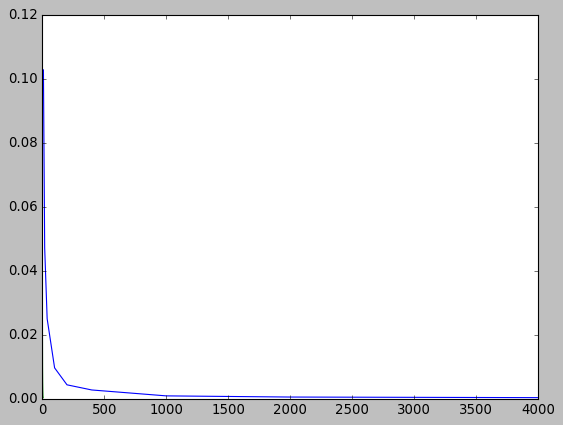

In [6]:
def variance_experiment(n_shots):
    """Run an experiment to determine the variance in an expectation
    value computed with a given number of shots.

    Args:
        n_shots (int): The number of shots

    Returns:
        float: The variance in expectation value we obtain running the
        circuit 100 times with n_shots shots each.
    """

    # To obtain a variance, we run the circuit multiple times at each shot value.
    n_trials = 100

    dev = qml.device('default.qubit', wires=1, shots=n_shots)
    
    @qml.qnode(dev)
    def circuit():
        qml.Hadamard(wires=0)
        return qml.expval(qml.PauliZ(wires=0))

    # RUN THE QNODE N_TRIALS TIMES AND RETURN THE VARIANCE OF THE RESULTS
    exp_values = []
    for i in range(n_trials):
        exp_values.append(circuit())

    return np.var(exp_values)


def variance_scaling(n_shots):
    """Once you have determined how the variance in expectation value scales
    with the number of shots, complete this function to programmatically
    represent the relationship.

    Args:
        n_shots (int): The number of shots

    Returns:
        float: The variance in expectation value we expect to see when we run
        an experiment with n_shots shots.
    """

    estimated_variance = 1/n_shots

    return estimated_variance

# Various numbers of shots; you can change this
shot_vals = [10, 20, 40, 100, 200, 400, 1000, 2000, 4000]

# Used to plot your results
results_experiment = [variance_experiment(shots) for shots in shot_vals]
results_scaling = [variance_scaling(shots) for shots in shot_vals]
plt.plot(shot_vals, results_experiment, results_scaling)